In [1]:
import numpy as np
import pandas as pd
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [234]:
# Categories: 116; contineous: 14
# No missing data
# cont1 (656), cont9 (354): date; cont7/loss happened on cont1; (lin_cont1 - lin_cont9)?
# cont6; cont7 was correlated with Per Capita Income per state; cont6 and cont7 probably measure the same thing); Perhaps premiums paid

# cont10(177)
# cont11, cont12 (337): high-related, cont11 + difference(cont12-cont11)
# cont13 (361)

# cont2, cont3: age-related (years for driving, age)
# cont4 (113), cont8 (203), cont5 (144), cont14 (21372)

# cat73-cat76: 3 classes
# cat77-cat88: 4 classes
# cat89 (9), cat90 (7), cat91 (8), cat92 (9), cat93 (5), cat94 (7), cat95 (5), cat96 (9), cat97 (7), cat98 (5), 
# cat99 (17), cat100 (15), cat101 (19), cat102 (9), cat103 (14), cat104 (17), cat105 (20), cat106 (18), cat107 (20),
# cat108 (11), cat109 (85), cat110 (134), cat111 (17), cat112 (51), cat113 (63), cat114 (19), cat115 (23), cat116 (349)
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
train.shape, test.shape

((188318, 132), (125546, 131))

In [3]:
train.head()

id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9   ...        cont6  \
0   1    A    B    A    B    A    A    A    A    B   ...     0.718367   
1   2    A    B    A    A    A    A    A    A    B   ...     0.438917   
2   5    A    B    A    A    B    A    A    A    B   ...     0.289648   
3  10    B    B    A    B    A    A    A    A    B   ...     0.440945   
4  11    A    B    A    B    A    A    A    A    B   ...     0.178193   

      cont7    cont8    cont9   cont10    cont11    cont12    cont13  \
0  0.335060  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493   
1  0.436585  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431   
2  0.315545  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709   
3  0.391128  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077   
4  0.247408  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011   

     cont14     loss  
0  0.714843  2213.18  
1  0.304496  1283.60  
2  0.774425  3005.09  
3  0.602642   939.85  
4  0.432606  2763.85  

[5 rows x 132 columns]

In [235]:
train_target = train['loss']
test_id = test['id']

train = train.drop(['loss'], axis = 1)
train.shape, test.shape

((188318, 131), (125546, 131))

In [236]:
train_num = train.shape[0]
df = pd.concat((train, test), axis = 0, ignore_index = True)

In [237]:
df.iloc[:,-14:].describe()

cont1          cont2          cont3          cont4  \
count  313864.000000  313864.000000  313864.000000  313864.000000   
mean        0.494096       0.507089       0.498653       0.492021   
std         0.187768       0.207056       0.201961       0.211101   
min         0.000016       0.001149       0.002634       0.176921   
25%         0.347403       0.358319       0.336963       0.327354   
50%         0.475784       0.555782       0.527991       0.452887   
75%         0.625272       0.681761       0.634224       0.652072   
max         0.984975       0.862654       0.944251       0.956046   

               cont5          cont6          cont7          cont8  \
count  313864.000000  313864.000000  313864.000000  313864.000000   
mean        0.487513       0.491442       0.485360       0.486823   
std         0.209063       0.205394       0.178531       0.199442   
min         0.281143       0.012683       0.069503       0.236880   
25%         0.281143       0.336105       0.351299       0.317960   
50%         0.422268       0.440945       0.438650       0.441060   
75%         0.643315       0.655818       0.591165       0.623580   
max         0.983674       0.997162       1.000000       0.982800   

              cont9         cont10         cont11         cont12  \
count  313864.00000  313864.000000  313864.000000  313864.000000   
mean        0.48571       0.498403       0.493850       0.493503   
std         0.18185       0.185906       0.210002       0.209716   
min         0.00008       0.000000       0.035321       0.036232   
25%         0.35897       0.364580       0.310961       0.314945   
50%         0.44145       0.461190       0.457203       0.462286   
75%         0.56889       0.619840       0.678924       0.679096   
max         0.99540       0.994980       0.998742       0.998484   

              cont13         cont14  
count  313864.000000  313864.000000  
mean        0.493917       0.495665  
std         0.212911       0.222537  
min         0.000228       0.178568  
25%         0.315758       0.294657  
50%         0.363547       0.407020  
75%         0.689974       0.724707  
max         0.988494       0.844848

In [24]:
corr = df.iloc[:,-14:].corr()
corr
#sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, square = True)

cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
cont1   1.000000 -0.083952 -0.445421  0.367405 -0.024688  0.758326  0.367416   
cont2  -0.083952  1.000000  0.455592  0.039860  0.189055  0.016276  0.048294   
cont3  -0.445421  0.455592  1.000000 -0.342102  0.089966 -0.349864  0.097863   
cont4   0.367405  0.039860 -0.342102  1.000000  0.162684  0.221849 -0.113945   
cont5  -0.024688  0.189055  0.089966  0.162684  1.000000 -0.150292 -0.249430   
cont6   0.758326  0.016276 -0.349864  0.221849 -0.150292  1.000000  0.658667   
cont7   0.367416  0.048294  0.097863 -0.113945 -0.249430  0.658667  1.000000   
cont8   0.361388  0.137631 -0.184817  0.531246  0.009375  0.438032  0.143452   
cont9   0.930675 -0.031313 -0.417043  0.329785 -0.087344  0.797387  0.384268   
cont10  0.808348  0.063809 -0.326211  0.283009 -0.066091  0.883910  0.492947   
cont11  0.596406  0.117304  0.024356  0.122028 -0.150864  0.774715  0.747605   
cont12  0.614666  0.106756  0.004944  0.131676 -0.147580  0.786202  0.743182   
cont13  0.533811  0.022391 -0.420499  0.179797 -0.083578  0.813994  0.286068   
cont14  0.056945 -0.046519 -0.039961  0.017699 -0.022065  0.041351  0.021427   

           cont8     cont9    cont10    cont11    cont12    cont13    cont14  
cont1   0.361388  0.930675  0.808348  0.596406  0.614666  0.533811  0.056945  
cont2   0.137631 -0.031313  0.063809  0.117304  0.106756  0.022391 -0.046519  
cont3  -0.184817 -0.417043 -0.326211  0.024356  0.004944 -0.420499 -0.039961  
cont4   0.531246  0.329785  0.283009  0.122028  0.131676  0.179797  0.017699  
cont5   0.009375 -0.087344 -0.066091 -0.150864 -0.147580 -0.083578 -0.022065  
cont6   0.438032  0.797387  0.883910  0.774715  0.786202  0.813994  0.041351  
cont7   0.143452  0.384268  0.492947  0.747605  0.743182  0.286068  0.021427  
cont8   1.000000  0.452110  0.337773  0.304621  0.318134  0.475566  0.044115  
cont9   0.452110  1.000000  0.786035  0.608503  0.627238  0.640639  0.074520  
cont10  0.337773  0.786035  1.000000  0.703953  0.715014  0.707290  0.041027  
cont11  0.304621  0.608503  0.703953  1.000000  0.994390  0.466106  0.047297  
cont12  0.318134  0.627238  0.715014  0.994390  1.000000  0.478686  0.050214  
cont13  0.475566  0.640639  0.707290  0.466106  0.478686  1.000000  0.046541  
cont14  0.044115  0.074520  0.041027  0.047297  0.050214  0.046541  1.000000

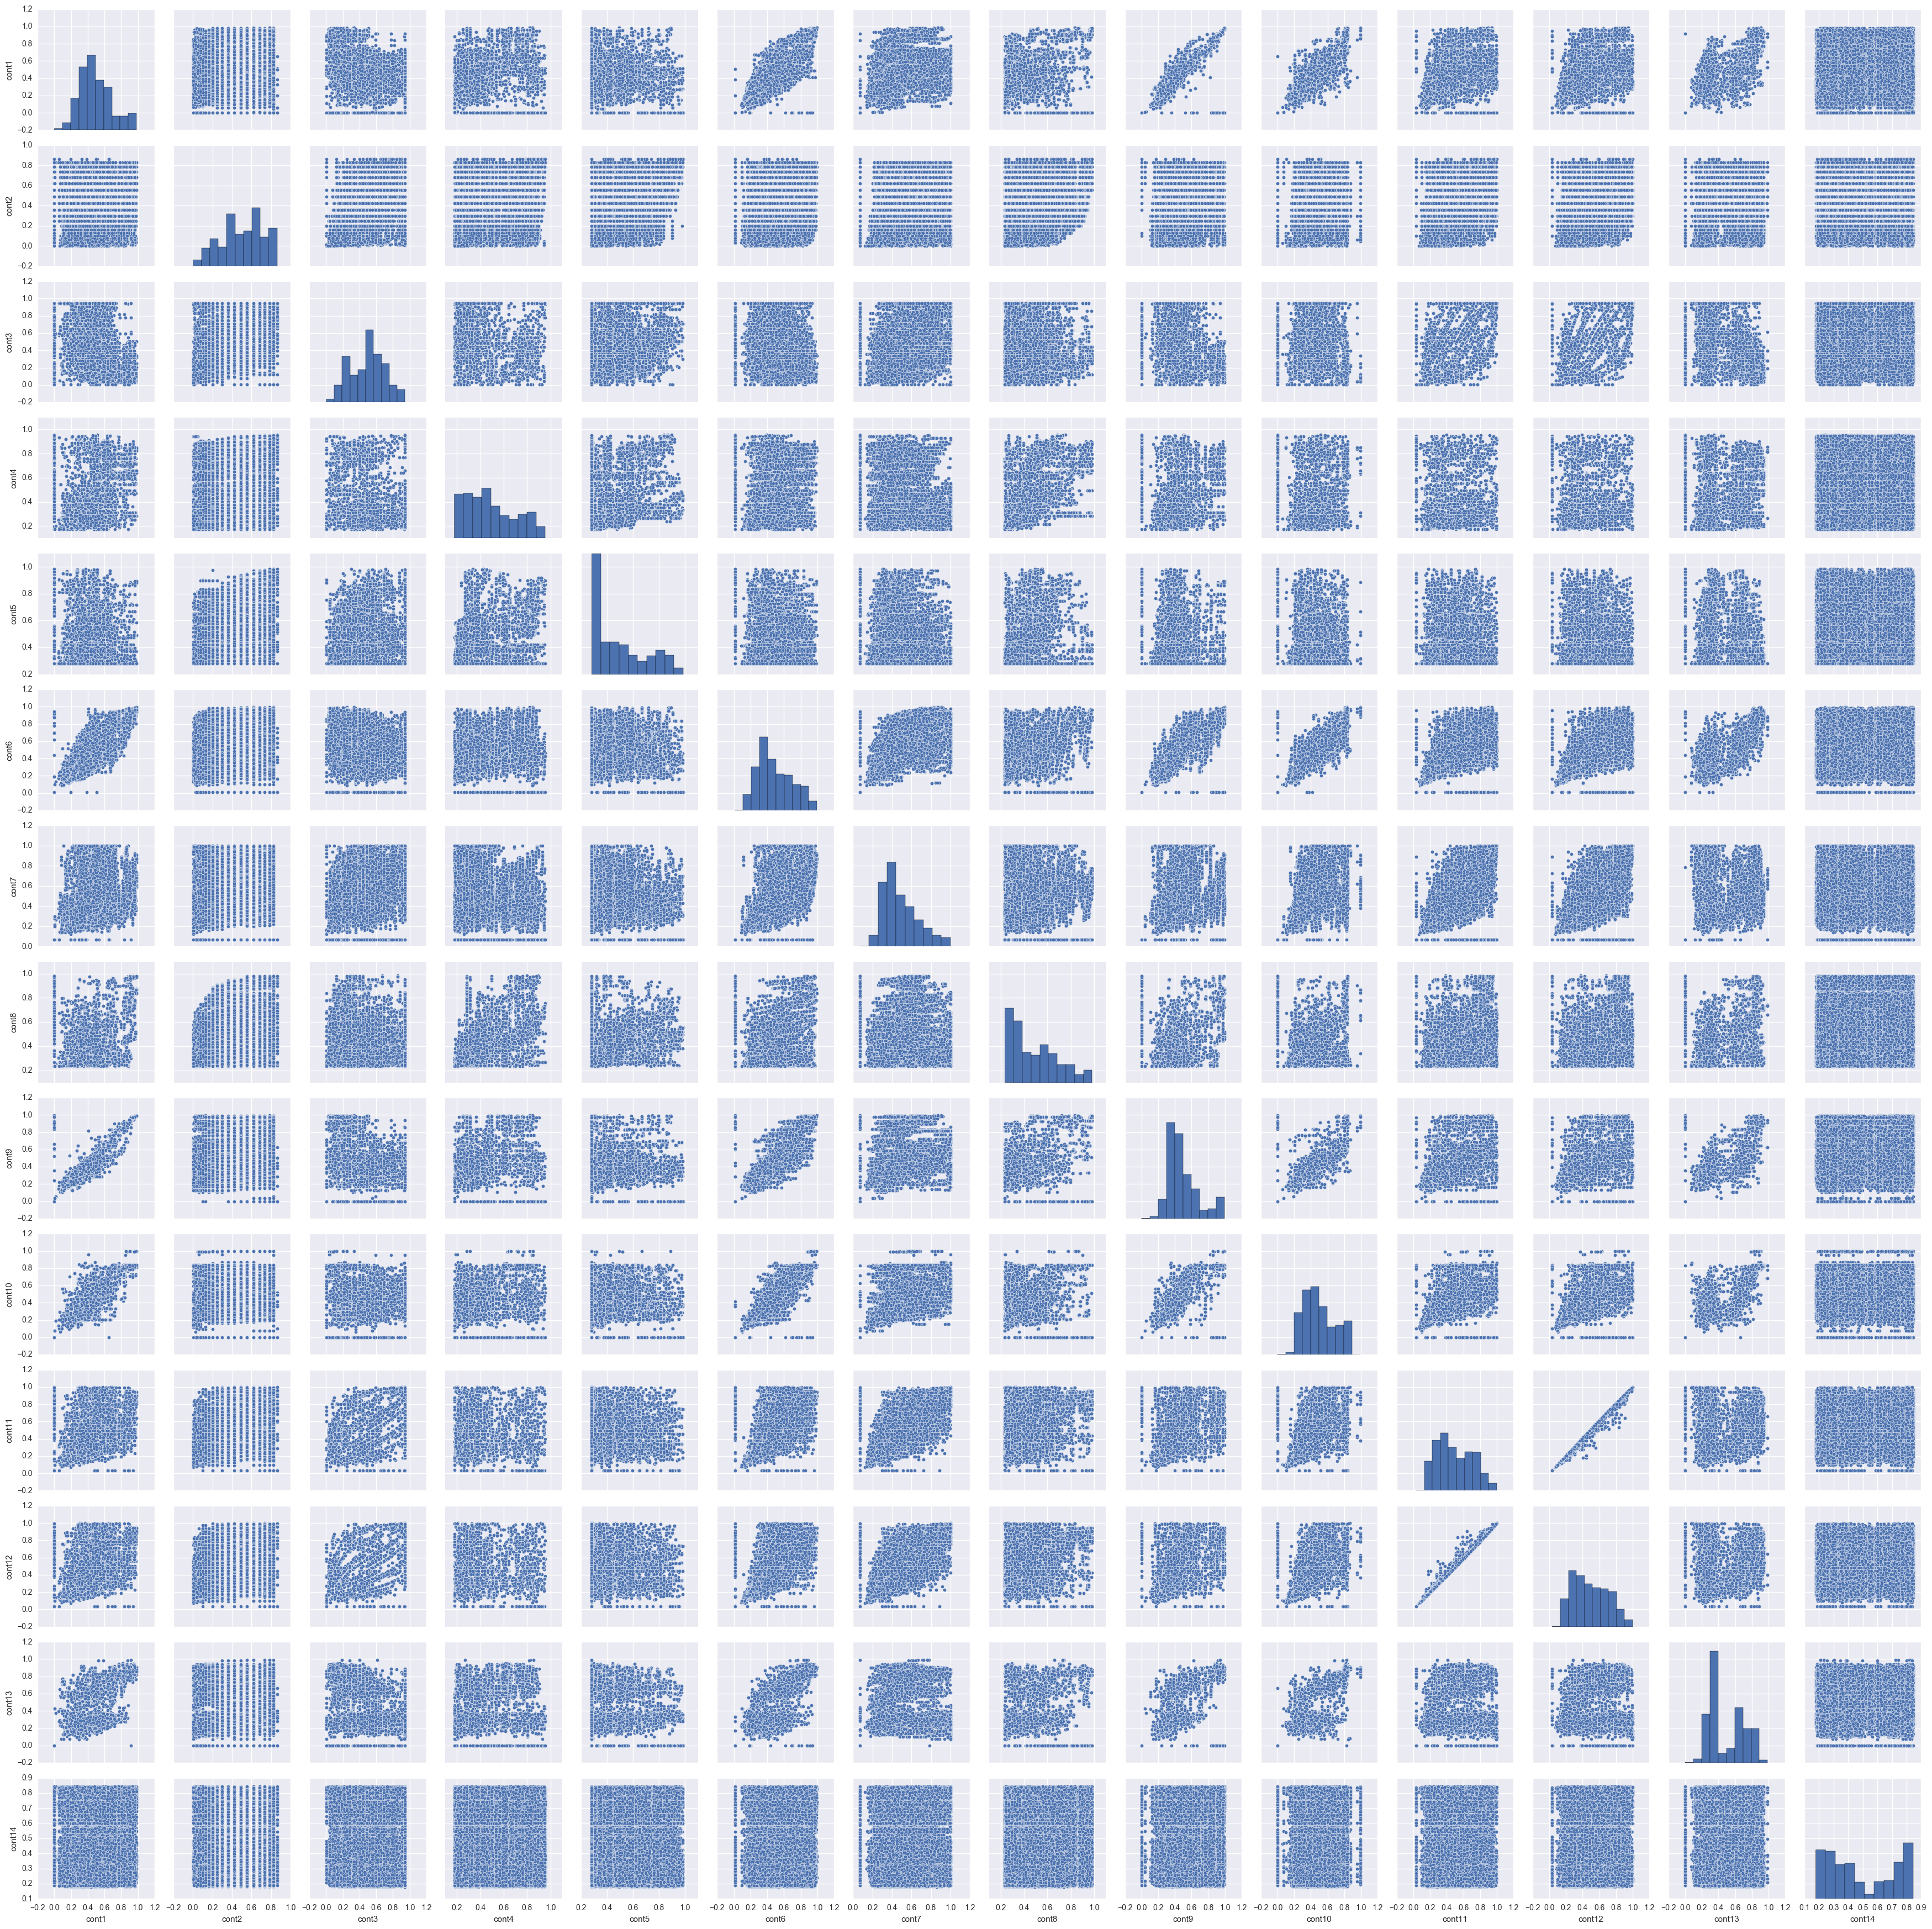

In [22]:
sns.pairplot(df.iloc[:,-14:])

### Date Exploration (Reference: dmi3kno, Tony S)
https://www.kaggle.com/dmi3kno/allstate-claims-severity/allstate-fingerprints-eda
https://www.kaggle.com/c/allstate-claims-severity/forums/t/24551/data-pre-processing-techniques-and-how-to-work-with-them/140310#post140310

1. Autocorrelation and Partial Autocorrelation
2. sine-contour: y = A sin(Bx + C) + D ,where amplitude is A, period is 2π/B, phase shift is −C/B, vertical shift is D
we are fitting half a period, so the constant B will be equal to π/length(df_original)
3. de-barrelling function: different neibors
4. similar patterns: cont1(35,0.98,0.87), cont9(20,0.99,0.96), cont6(32,0.99,0.99), cont7 (unchanged), cont8 (unchanged), cont10(40,0.99,0.97), cont11(unchanged), cont12(unchanged), cont13(20,0.99,0.95), cont14(unchanged)

In [55]:
def deBarrel(sortedData, i, window_size, digits=4):
    # half the window size but not less than 1
    if i <= 0:
        return np.nan
    beginning_of_window = int(np.floor(i-window_size/2))
    if beginning_of_window < 0:
        beginning_of_window = 0
        
    end_of_window = beginning_of_window + window_size
    if end_of_window > sortedData.shape[0]:
        end_of_window = sortedData.shape[0]
        
    subdate = sortedData.iloc[beginning_of_window:end_of_window]
    subdate = (subdate.shift(-1) - subdate).round(digits)
    most_freq_value = subdate.value_counts().idxmax()
    current_lag = sortedData.iloc[i] - sortedData.iloc[i-1]
    days_equivalent = current_lag / most_freq_value
    return days_equivalent

#### cont1

In [276]:
data = df['cont1'].drop_duplicates().sort_values()
data = pd.DataFrame({'cont1': data,'cont1_diff': (data-data.shift(1)).fillna(0),'X': range(len(data))})
data.head(10)

X     cont1  cont1_diff
422     0  0.000016    0.000000
7151    1  0.007274    0.007258
63137   2  0.016235    0.008961
9017    3  0.048643    0.032408
758     4  0.057987    0.009344
58975   5  0.058944    0.000957
141130  6  0.059591    0.000647
5497    7  0.061571    0.001980
81658   8  0.062925    0.001354
46355   9  0.067156    0.004231

In [283]:
data.head(50)

X     cont1  cont1_diff
422      0  0.000016    0.000000
7151     1  0.007274    0.007258
63137    2  0.016235    0.008961
9017     3  0.048643    0.032408
758      4  0.057987    0.009344
58975    5  0.058944    0.000957
141130   6  0.059591    0.000647
5497     7  0.061571    0.001980
81658    8  0.062925    0.001354
46355    9  0.067156    0.004231
1088    10  0.067520    0.000364
30912   11  0.068624    0.001104
18009   12  0.069369    0.000745
2514    13  0.071264    0.001895
166661  14  0.072036    0.000772
146296  15  0.075199    0.003163
32841   16  0.081044    0.005845
10705   17  0.082788    0.001744
1950    18  0.088228    0.005440
22711   19  0.091068    0.002840
30308   20  0.091549    0.000481
251226  21  0.092032    0.000483
98016   22  0.093006    0.000974
216752  23  0.093989    0.000983
2648    24  0.094484    0.000495
28646   25  0.094982    0.000498
23274   26  0.098015    0.003033
17527   27  0.098529    0.000514
1747    28  0.099045    0.000516
4353    29  0.100085    0.001040
95930   30  0.100609    0.000524
20016   31  0.101135    0.000526
5259    32  0.102727    0.001592
1474    33  0.105979    0.003252
3210    34  0.107083    0.001104
2916    35  0.109321    0.002238
4504    36  0.110456    0.001135
85422   37  0.111027    0.000571
13156   38  0.111601    0.000574
1115    39  0.112756    0.001155
2199    40  0.113337    0.000581
2474    41  0.113921    0.000584
340     42  0.115097    0.001176
5569    43  0.115689    0.000592
5567    44  0.116284    0.000595
99377   45  0.119297    0.003013
766     46  0.121137    0.001840
95940   47  0.123629    0.002492
3457    48  0.124258    0.000629
3589    49  0.124891    0.000633

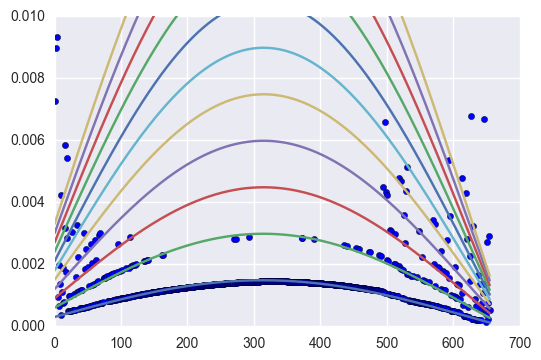

In [80]:
plt.scatter(data.X[1:], data.cont1_diff[1:])
plt.xlim(0, 700)
plt.ylim(0, 0.01)
for i in range(1, 12):
    plt.plot(data.X, i*0.0012*np.sin(np.pi/630*data.X) + 0.0003*i - 5e-08*data.X)   

In [107]:
# sine-contour
from scipy.stats.stats import pearsonr
data['cont1_sin_diff'] = (data.cont1_diff + 5e-8 * data.X) / (0.0012*np.sin(np.pi/630*data.X) + 0.0003)
data['cont1_sin'] = data['cont1_sin_diff'].cumsum().fillna(0).astype(np.int)
data['cont1_sin_diff'] = data['cont1_sin_diff'].fillna(0).astype(np.int)
print pearsonr(data.cont1, data.cont1_sin), pearsonr(data.cont1_diff, data.cont1_sin_diff)
# de-barrelling function
#for k in range(10, 61, 5):
for k in [35]:
    data['cont1_bar_diff'] = data['X'].map(lambda x: deBarrel(data['cont1'], x, k, 4))
    data['cont1_bar'] = data['cont1_bar_diff'].fillna(0).cumsum().astype(np.int)
    data['cont1_bar_diff'] = data['cont1_bar_diff'].fillna(0).astype(np.int)
    print k, pearsonr(data.cont1, data.cont1_bar), pearsonr(data.cont1_diff, data.cont1_bar_diff)

(0.98314409281211312, 0.0) (0.92126466761800574, 2.0416273782169631e-270)
35 (0.98335813588060739, 0.0) (0.87546524233458956, 1.0428309284893011e-208)


In [108]:
df = df.merge(data[['cont1','cont1_diff','cont1_bar','cont1_bar_diff']], on = 'cont1', how = 'left')
df.head(2)

id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9      ...          cont8  \
0   1    A    B    A    B    A    A    A    A    B      ...        0.30260   
1   2    A    B    A    A    A    A    A    A    B      ...        0.60087   

     cont9   cont10    cont11    cont12    cont13    cont14 cont1_diff  \
0  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843   0.001155   
1  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496   0.001282   

  cont1_bar cont1_bar_diff  
0       748              0  
1       455              0  

[2 rows x 134 columns]

#### cont9

In [119]:
data = df['cont9'].drop_duplicates().sort_values()
data = pd.DataFrame({'cont9': data,'cont9_diff': (data-data.shift(1)).fillna(0),'X': range(len(data))})
#for k in range(2, 25, 1):
for k in [20]:
    data['cont9_bar_diff'] = data['X'].map(lambda x: deBarrel(data['cont9'], x, k, 4))
    data['cont9_bar'] = data['cont9_bar_diff'].fillna(0).cumsum().astype(np.int)
    data['cont9_bar_diff'] = data['cont9_bar_diff'].fillna(0).astype(np.int)
    print k, pearsonr(data.cont9, data.cont9_bar), pearsonr(data.cont9_diff, data.cont9_bar_diff)
df = df.merge(data[['cont9','cont9_diff','cont9_bar','cont9_bar_diff']], on = 'cont9', how = 'left')
df.head(2)

20 (0.99231736401379267, 1.4723156246069147e-321) (0.95652768889635231, 1.8815891602415332e-190)


In [ ]:
df = df.merge(data[['cont9','cont9_diff','cont9_bar','cont9_bar_diff']], on = 'cont9', how = 'left')
df.head(2)

#### cont6

In [115]:
data = df['cont6'].drop_duplicates().sort_values()
data = pd.DataFrame({'cont6': data,'cont6_diff': (data-data.shift(1)).fillna(0),'X': range(len(data))})
#for k in range(30, 50, 1):
for k in [32]: # gap: <=31, 32/33 -> >=37
    data['cont6_bar_diff'] = data['X'].map(lambda x: deBarrel(data['cont6'], x, k, 4))
    data['cont6_bar'] = data['cont6_bar_diff'].fillna(0).cumsum().astype(np.int)
    data['cont6_bar_diff'] = data['cont6_bar_diff'].fillna(0).astype(np.int)
    print k, pearsonr(data.cont6, data.cont6_bar), pearsonr(data.cont6_diff, data.cont6_bar_diff)
df = df.merge(data[['cont6','cont6_diff','cont6_bar','cont6_bar_diff']], on = 'cont6', how = 'left')
df.head(2)

32 (0.98716558597749038, 0.0) (0.99559407734699712, 0.0)


id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9      ...          cont14  \
0   1    A    B    A    B    A    A    A    A    B      ...        0.714843   
1   2    A    B    A    A    A    A    A    A    B      ...        0.304496   

  cont1_diff cont1_bar cont1_bar_diff cont9_diff cont9_bar cont9_bar_diff  \
0   0.001155       748              0    0.00559       438              2   
1   0.001282       455              0    0.00382       280              2   

  cont6_diff cont6_bar cont6_bar_diff  
0   0.000238      3550              1  
1   0.000290      2575              0  

[2 rows x 140 columns]

#### cont10

In [142]:
data = df['cont10'].drop_duplicates().sort_values()
data = pd.DataFrame({'cont10': data,'cont10_diff': (data-data.shift(1)).fillna(0),'X': range(len(data))})
#for k in range(30, 51, 1):
for k in [40]: 
    data['cont10_bar_diff'] = data['X'].map(lambda x: deBarrel(data['cont10'], x, k, 4))
    data['cont10_bar'] = data['cont10_bar_diff'].fillna(0).cumsum().astype(np.int)
    data['cont10_bar_diff'] = data['cont10_bar_diff'].fillna(0).astype(np.int)
    print k, pearsonr(data.cont10, data.cont10_bar), pearsonr(data.cont10_diff, data.cont10_bar_diff)
df = df.merge(data[['cont10','cont10_diff','cont10_bar','cont10_bar_diff']], on = 'cont10', how = 'left')
df.head(2)

40 (0.99649530606961145, 1.6280479502658745e-190) (0.97295001981824947, 2.6843393150709025e-113)


#### cont13

In [160]:
data = df['cont13'].drop_duplicates().sort_values()
data = pd.DataFrame({'cont13': data,'cont13_diff': (data-data.shift(1)).fillna(0),'X': range(len(data))})
#for k in range(10, 31, 1):
for k in [20]: 
    data['cont13_bar_diff'] = data['X'].map(lambda x: deBarrel(data['cont13'], x, k, 4))
    data['cont13_bar'] = data['cont13_bar_diff'].fillna(0).cumsum().astype(np.int)
    data['cont13_bar_diff'] = data['cont13_bar_diff'].fillna(0).astype(np.int)
    print k, pearsonr(data.cont13, data.cont13_bar), pearsonr(data.cont13_diff, data.cont13_bar_diff)
df = df.merge(data[['cont13','cont13_diff','cont13_bar','cont13_bar_diff']], on = 'cont13', how = 'left')
df.head(2)

20 (0.99320541520509786, 0.0) (0.95279954729079264, 6.185207144308215e-188)


id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9       ...        \
0   1    A    B    A    B    A    A    A    A    B       ...         
1   2    A    B    A    A    A    A    A    A    B       ...         

  cont9_bar_diff cont6_diff cont6_bar cont6_bar_diff cont10_diff cont10_bar  \
0              2   0.000238      3550              1     0.00308        188   
1              2   0.000290      2575              0     0.00546        105   

  cont10_bar_diff cont13_diff cont13_bar cont13_bar_diff  
0               0    0.001955        350               1  
1               0    0.003172        268               0  

[2 rows x 146 columns]

(0, 0.002)

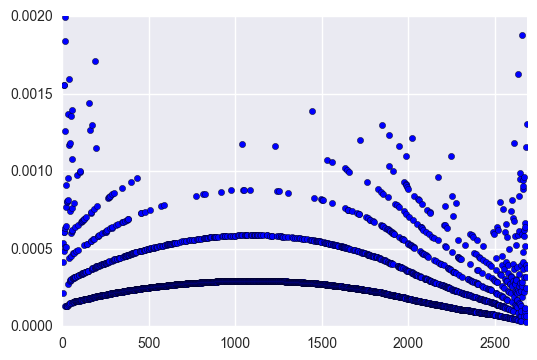

In [161]:
data = df['cont14'].drop_duplicates().sort_values()
data = pd.DataFrame({'cont14': data,'Y': (data-data.shift(1)).fillna(0),'X': range(len(data))})
plt.scatter(date.X[:-1], date.Y[:-1])
plt.xlim(0, date.shape[0])
plt.ylim(0, 0.002)
#for i in range(1, 12):
#    plt.plot(date.X, i*0.00015*np.sin(np.pi/2500*date.X) + 0.0002*i - 8e-8*date.X)   

In [162]:
data = df['cont14'].drop_duplicates().sort_values()
data = pd.DataFrame({'cont14': data,'cont14_diff': (data-data.shift(1)).fillna(0),'X': range(len(data))})
for k in range(5, 101, 5):
#for k in [20]: 
    data['cont14_bar_diff'] = data['X'].map(lambda x: deBarrel(data['cont14'], x, k, 4))
    data['cont14_bar'] = data['cont14_bar_diff'].fillna(0).cumsum().astype(np.int)
    data['cont14_bar_diff'] = data['cont14_bar_diff'].fillna(0).astype(np.int)
    print k, pearsonr(data.cont14, data.cont14_bar), pearsonr(data.cont14_diff, data.cont14_bar_diff)

5 (-0.018021410963450946, 0.0084226627346130883) (0.19718619375389976, 2.5639167272298888e-186)
10 (-0.010434887939316904, 0.12714793268768348) (0.14603611353864146, 3.4405369560460019e-102)
15 (-0.010434887939316904, 0.12714793268768348) (0.11467775059042173, 1.7574877582365685e-63)
20 (-0.010434887939316904, 0.12714793268768348) (0.10204311098604045, 1.4226058905567502e-50)
25 (-0.010434887939316904, 0.12714793268768348) (0.058998493319739671, 6.0234484399166727e-18)
30 (-0.010434887939316904, 0.12714793268768348) (0.035360101908280844, 2.3326074246445162e-07)
35 (-0.010434887939316904, 0.12714793268768348) (0.018952985522849002, 0.0055909296966464937)
40 (-0.010434887939316904, 0.12714793268768348) (0.0091260221246198588, 0.182171733709525)
45 (-0.010434887939316904, 0.12714793268768348) (0.0040820121793363785, 0.55069186779548063)
50 (-0.010434887939316904, 0.12714793268768348) (0.014961562403351376, 0.028724274970012245)
55 (-0.010434887939316904, 0.12714793268768348) (-0.00244453

# Lin_data

In [247]:
train = pd.read_csv('../input/lin_train.csv')
test = pd.read_csv('../input/lin_test.csv')
print train.shape, test.shape

(188318, 146) (125546, 146)


In [248]:
train_target = train['loss']
test_id = test['id']

train = train.drop(['id','loss'], axis = 1)
test = test.drop(['id','loss'], axis = 1)

train_num = train.shape[0]
df = pd.concat((train, test), axis = 0, ignore_index = True)
df.head()

cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10    ...     lin_cont5  \
0    A    B    A    B    A    A    A    A    B     A    ...             4   
1    A    B    A    A    A    A    A    A    B     B    ...            86   
2    A    B    A    A    B    A    A    A    B     B    ...            15   
3    B    B    A    B    A    A    A    A    B     A    ...            18   
4    A    B    A    B    A    A    A    A    B     B    ...            52   

  lin_cont6 lin_cont7 lin_cont8 lin_cont9 lin_cont10 lin_cont11 lin_cont12  \
0      3113     15349        14       426        204        204        213   
1      2108     19693        66       269        119        143        152   
2      1554     14452         8       218         98        155        154   
3      2115     17790        17       253        120        140        139   
4      1016     10953         2       192         72         99         98   

  lin_cont13 lin_cont14  
0        360      78178  
1        280      22654  
2        140      88713  
3        278      62417  
4        162      40532  

[5 rows x 144 columns]

In [259]:
df.iloc[:,-14:].describe()

lin_cont1      lin_cont2      lin_cont3      lin_cont4  \
count  313864.000000  313864.000000  313864.000000  313864.000000   
mean      581.671896      25.166620      52.728360      37.626042   
std       161.101318       3.719585      11.374909      24.474584   
min         0.000000      -2.000000       0.000000       0.000000   
25%       471.000000      23.000000      45.000000      20.000000   
50%       563.000000      26.000000      54.000000      33.000000   
75%       668.000000      28.000000      59.000000      53.000000   
max      1235.000000      32.000000      85.000000     113.000000   

           lin_cont5      lin_cont6      lin_cont7      lin_cont8  \
count  313864.000000  313864.000000  313864.000000  313864.000000   
mean       27.023271    2317.240047   22085.974435      48.959696   
std        28.784990     841.712513    8899.382617      41.839242   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000    1739.000000   16074.000000      17.000000   
50%        18.000000    2115.000000   19779.000000      39.000000   
75%        44.000000    2866.000000   26036.000000      70.000000   
max       145.000000    5608.000000   61527.000000     217.000000   

           lin_cont9     lin_cont10     lin_cont11     lin_cont12  \
count  313864.000000  313864.000000  313864.000000  313864.000000   
mean      343.005722     131.056808     186.048065     187.897421   
std       113.732822      37.752062      64.128107      65.519916   
min         0.000000       0.000000       0.000000       0.000000   
25%       273.000000     106.000000     135.000000     137.000000   
50%       314.000000     123.000000     175.000000     178.000000   
75%       375.000000     153.000000     234.000000     237.000000   
max       908.000000     290.000000     579.000000     585.000000   

          lin_cont13     lin_cont14  
count  313864.000000  313864.000000  
mean      246.021054   49120.127144  
std        72.695026   32155.655789  
min         0.000000       0.000000  
25%       188.000000   21123.000000  
50%       204.000000   37210.000000  
75%       306.000000   79759.000000  
max       509.000000  104060.000000

In [227]:
for k in range(1, 15):
    key = 'cont'+str(k)
    print k, df[[key, 'lin_'+key]].corr().iloc[0,1], min(df[key]), max(df[key]), min(df['lin_'+key]), max(df['lin_'+key])

1 0.988383301119 1.6e-05 0.984975 0 1235
2 0.986557511163 0.001149 0.862654 -2 32
3 0.987308324845 0.002634 0.944251 0 85
4 0.993940592721 0.176921 0.956046 0 113
5 0.991455396302 0.281143 0.983674 0 145
6 0.990782963915 0.012683 0.997162 0 5608
7 0.983588497406 0.069503 1.0 0 61527
8 0.981032922049 0.23688 0.9828 0 217
9 0.982419899946 8e-05 0.9954 0 908
10 0.997509323081 0.0 0.99498 0 290
11 0.988582412 0.035321 0.998742 0 579
12 0.988677791193 0.036232 0.998484 0 585
13 0.995891204408 0.000228 0.988494 0 509
14 0.998679608478 0.178568 0.844848 0 104060


In [322]:
df.loc[df.lin_cont7!=0,['lin_cont1','lin_cont9','lin_cont6','lin_cont7']].drop_duplicates().sort(['lin_cont7','lin_cont6','lin_cont9','lin_cont1']).head(100)

/Users/didle/OtherSoftwares/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


lin_cont1  lin_cont9  lin_cont6  lin_cont7
101571        334        166        756       3367
251226        184        152        459       4286
46355         137        123        553       4351
246529        309        162        745       4387
53512         248        195        822       4401
81658         128        156       1230       4575
219902        197        129        666       4695
220160        340        163        833       4786
244638        391        194       1219       4816
184431        627        436       1336       4844
189497        549        392       1795       4935
192666        284        166        743       4973
94376         340        163        868       5013
51120         438        271       1176       5156
83624         387        206       1002       5288
313626        549        392       1854       5303
182278        590        397       2037       5304
307873        677        302       1912       5342
22444         304        187        712       5352
228497        381        206       1023       5369
302428        687        392       1887       5443
187497        687        392       1909       5443
189800        418        252       1247       5444
207418        334        179        751       5501
193742        549        390       2004       5514
63630         310        152        635       5560
96354         387        206        974       5568
205623        453        305       1177       5576
54115         338        183        900       5646
269399        287        158        702       5699
...           ...        ...        ...        ...
10705         167        152        587       6452
137776        310        152        651       6466
258620        414        265       1326       6470
5277          467        227       1363       6481
1272          514        301       1575       6493
68767         582        397       2037       6509
18556         453        305       1235       6549
48931         272        214       1059       6558
70989         359        206        883       6661
12522         513        341       1610       6680
219686        275        155       1124       6691
56271         375        179       1031       6708
68845         418        265       1357       6709
1387          675        303       1808       6722
6742          582        397       2077       6729
193659        494        235       1130       6749
31075         494        235       1119       6759
37420         402        193        963       6763
134501        687        392       1891       6770
2730          358        179        835       6811
12826         467        227       1366       6822
34042         390        262       1129       6826
147066        483        257       1429       6848
76322         551        232       1491       6851
113235        453        305       1245       6880
22284         381        206        999       6889
293667        494        235       1130       6893
67785         385        206       1031       6898
9212          390        262       1179       6916
104173        637        278       1604       6925

[100 rows x 4 columns]

In [302]:
df[['cont1','cont6','cont7','lin_cont1','lin_cont6','lin_cont7']].sort(['cont10','cont9']).drop_duplicates()

/Users/didle/OtherSoftwares/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


cont9   cont10  lin_cont9  lin_cont10
422     0.00008  0.00000          0           0
63187   0.24180  0.00000        206           0
46477   0.35704  0.00000        272           0
40294   0.52100  0.00000        352           0
64609   0.59949  0.00000        390           0
53029   0.61353  0.00000        397           0
234266  0.62147  0.00000        401           0
239205  0.66013  0.00000        420           0
188510  0.83735  0.00000        539           0
12944   0.85380  0.00000        555           0
135699  0.87075  0.00000        572           0
9983    0.89098  0.00000        596           0
30698   0.89888  0.00000        606           0
267170  0.90411  0.00000        612           0
11971   0.90627  0.00000        615           0
110788  0.92444  0.00000        644           0
184518  0.96909  0.00000        744           0
49677   0.97480  0.00000        762           0
39743   0.97621  0.00000        768           0
109069  0.99026  0.00000        844           0
154766  0.99540  0.00000        908           0
46355   0.13602  0.06232        123          21
7151    0.03786  0.07664         34          26
10705   0.16963  0.09777        152          34
251226  0.16963  0.09975        152          34
141130  0.17442  0.10381        156          36
101571  0.18685  0.11461        166          39
192666  0.18685  0.12395        166          43
189800  0.31945  0.12395        252          43
45247   0.18685  0.12886        166          45
...         ...      ...        ...         ...
4690    0.85380  0.83814        555         206
15388   0.85998  0.83814        561         206
375     0.93383  0.83814        661         206
2764    0.93688  0.83814        667         206
1507    0.96909  0.83814        744         206
12841   0.97081  0.83814        749         206
11300   0.97862  0.83814        778         206
48944   0.97965  0.83814        783         206
4777    0.99026  0.83814        844         206
2735    0.63909  0.84408        410         208
285601  0.34365  0.84698        265         209
6733    0.35511  0.85265        271         212
50731   0.89888  0.85815        606         214
16246   0.35511  0.86607        271         218
22399   0.71078  0.87114        449         221
5059    0.71250  0.87114        450         221
35459   0.85692  0.95454        558         266
114261  0.81945  0.95643        524         267
35579   0.87075  0.99048        572         287
4958    0.97310  0.99048        756         287
38619   0.91644  0.99451        630         289
2193    0.98330  0.99451        801         289
11857   0.99379  0.99451        883         289
67317   0.85380  0.99463        555         290
33477   0.97862  0.99463        778         290
3421    0.99026  0.99463        844         290
11209   0.98260  0.99475        797         290
134112  0.98330  0.99475        801         290
250090  0.91317  0.99498        625         290
6352    0.98330  0.99498        801         290

[1395 rows x 4 columns]

In [299]:
(df['cont12']-df['cont11']).sum()

-108.9637519999682

In [324]:
for k in range(116):
    cats = set(df.iloc[:,k])
    print k, len(cats), cats

0 2 set(['A', 'B'])
1 2 set(['A', 'B'])
2 2 set(['A', 'B'])
3 2 set(['A', 'B'])
4 2 set(['A', 'B'])
5 2 set(['A', 'B'])
6 2 set(['A', 'B'])
7 2 set(['A', 'B'])
8 2 set(['A', 'B'])
9 2 set(['A', 'B'])
10 2 set(['A', 'B'])
11 2 set(['A', 'B'])
12 2 set(['A', 'B'])
13 2 set(['A', 'B'])
14 2 set(['A', 'B'])
15 2 set(['A', 'B'])
16 2 set(['A', 'B'])
17 2 set(['A', 'B'])
18 2 set(['A', 'B'])
19 2 set(['A', 'B'])
20 2 set(['A', 'B'])
21 2 set(['A', 'B'])
22 2 set(['A', 'B'])
23 2 set(['A', 'B'])
24 2 set(['A', 'B'])
25 2 set(['A', 'B'])
26 2 set(['A', 'B'])
27 2 set(['A', 'B'])
28 2 set(['A', 'B'])
29 2 set(['A', 'B'])
30 2 set(['A', 'B'])
31 2 set(['A', 'B'])
32 2 set(['A', 'B'])
33 2 set(['A', 'B'])
34 2 set(['A', 'B'])
35 2 set(['A', 'B'])
36 2 set(['A', 'B'])
37 2 set(['A', 'B'])
38 2 set(['A', 'B'])
39 2 set(['A', 'B'])
40 2 set(['A', 'B'])
41 2 set(['A', 'B'])
42 2 set(['A', 'B'])
43 2 set(['A', 'B'])
44 2 set(['A', 'B'])
45 2 set(['A', 'B'])
46 2 set(['A', 'B'])
47 2 set(['A', 'B'])
48